In [1]:
import pandas as pd
from prophet import Prophet


/Users/tejaswinithota/Desktop/solar_forecasting/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv('scaled_average_daily_data.csv')  # Uncomment if loading from a file
data['ds'] = data['time']  # Rename time to ds
data['y'] = data['P']  # Rename power output column to y

In [3]:
model = Prophet()

In [4]:
model.add_regressor('Gb(i)')
model.add_regressor('Gd(i)')
model.add_regressor('Gr(i)')
model.add_regressor('H_sun')
model.add_regressor('T2m')
model.add_regressor('WS10m')

In [5]:
model.fit(data)

09:07:55 - cmdstanpy - INFO - Chain [1] start processing
09:07:57 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods=24, freq='H')

/Users/tejaswinithota/Desktop/solar_forecasting/myenv/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [8]:
last_row = data.iloc[-1]

In [9]:
future['Gb(i)'] = last_row['Gb(i)']
future['Gd(i)'] = last_row['Gd(i)']
future['Gr(i)'] = last_row['Gr(i)']
future['H_sun'] = last_row['H_sun']
future['T2m'] = last_row['T2m']
future['WS10m'] = last_row['WS10m']

In [10]:
forecast = model.predict(future)

In [11]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                     ds        yhat  yhat_lower  yhat_upper
0   2014-12-31 00:00:00  210.855656  209.013594  212.716047
1   2015-01-01 00:00:00  211.047316  209.258619  212.874409
2   2015-01-02 00:00:00  211.177917  209.445911  212.900121
3   2015-01-03 00:00:00  211.166357  209.377939  212.980514
4   2015-01-04 00:00:00  211.240855  209.406570  213.001894
..                  ...         ...         ...         ...
751 2016-12-31 20:00:00  212.312786  210.562192  214.086199
752 2016-12-31 21:00:00  212.315191  210.630595  214.151567
753 2016-12-31 22:00:00  212.317733  210.455000  214.052299
754 2016-12-31 23:00:00  212.320404  210.536072  214.346603
755 2017-01-01 00:00:00  212.323197  210.553812  214.083992

[756 rows x 4 columns]


/var/folders/r9/ld6l7sg96rn5bb8nz9j2dx580000gn/T/ipykernel_69407/2504494460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_df['ds'] = pd.to_datetime(forecast['ds'])


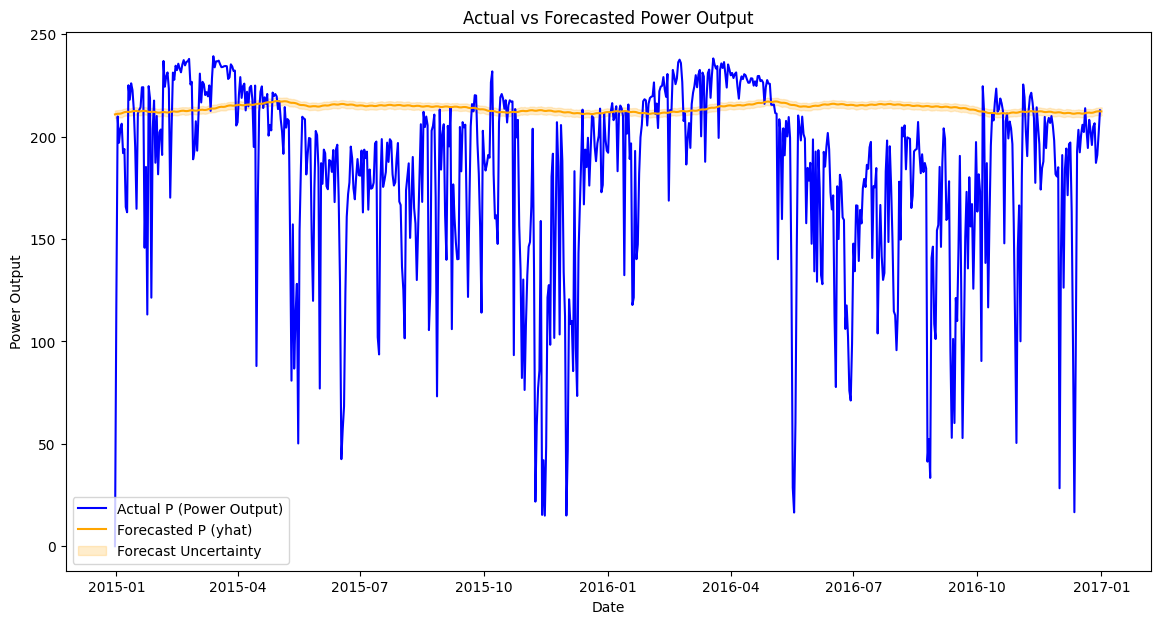

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'ds' columns to datetime format in both dataframes
data['ds'] = pd.to_datetime(data['ds'])
forecast_df['ds'] = pd.to_datetime(forecast['ds'])

# Merge the original data with the forecast on the 'ds' column
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
merged = pd.merge(data, forecast_df, on='ds', how='outer')

# Plot actual and forecasted values
plt.figure(figsize=(14, 7))

# Plot the actual values
plt.plot(merged['ds'], merged['P'], label='Actual P (Power Output)', color='blue')

# Plot the forecasted values
plt.plot(merged['ds'], merged['yhat'], label='Forecasted P (yhat)', color='orange')

# Plot the confidence intervals
plt.fill_between(merged['ds'], merged['yhat_lower'], merged['yhat_upper'], color='orange', alpha=0.2, label='Forecast Uncertainty')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Power Output')
plt.title('Actual vs Forecasted Power Output')
plt.legend()

# Show the plot
plt.show()
